In [2]:
import ipywidgets as widgets
import datetime as dt
import pandas as pd
import numpy as np
import zarr
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]


In [3]:
his_url="https://nx7384.your-storageshare.de/apps/sharingpath/wetwin/public/zunormm/ZUNO_his.zarr/"
his=xr.open_dataset(his_url,engine="zarr",consolidated=True)
his

<xarray.Dataset>
Dimensions:               (time: 2321, stations: 47, laydim: 45, laydimw: 46)
Coordinates:
    station_name          (stations) |S256 ...
    station_x_coordinate  (stations) float64 ...
    station_y_coordinate  (stations) float64 ...
  * time                  (time) datetime64[ns] 2022-06-01 ... 2022-06-17T02:...
    zcoordinate_c         (time, stations, laydim) float64 ...
    zcoordinate_w         (time, stations, laydimw) float64 ...
Dimensions without coordinates: stations, laydim, laydimw
Data variables:
    salinity              (time, stations, laydim) float32 ...
    waterlevel            (time, stations) float32 ...
    x_velocity            (time, stations, laydim) float32 ...
    y_velocity            (time, stations, laydim) float32 ...
Attributes:
    Conventions:    CF-1.5 Deltares-0.1
    date_created:   2022-08-24T12:36:54+0200
    date_modified:  2022-08-24T12:36:54+0200
    history:        Created on 2022-08-24T12:36:54+0200, D-Flow FM
    institution:    Deltares
    references:     http://www.deltares.nl
    source:         Deltares, D-Flow FM Version 1.2.143.140820, Feb 22 2022, ...

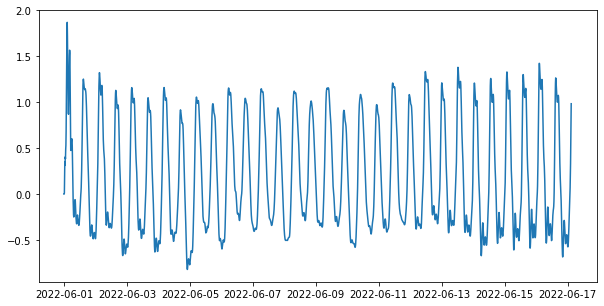

In [5]:
iloc=0
plt.plot(his.time[:],his.waterlevel[:,iloc])

## Zarr library

Above we're opening the dataset with Xarray. This is probably the recommended route in most cases, but you can also use the underlying zarr library directly.

In [12]:
ff=zarr.open_consolidated(his_url) #consolidated metadata is necessary when no directories can be listed as over http 

print(ff.tree())


/
 ├── salinity (2321, 47, 45) int16
 ├── station_name (47,) |S256
 ├── station_x_coordinate (47,) float64
 ├── station_y_coordinate (47,) float64
 ├── time (2321,) float64
 ├── waterlevel (2321, 47) int16
 ├── x_velocity (2321, 47, 45) int16
 ├── y_velocity (2321, 47, 45) int16
 ├── zcoordinate_c (2321, 47, 45) int32
 └── zcoordinate_w (2321, 47, 46) int32


In [14]:
print(ff.waterlevel.attrs.asdict())
ff.waterlevel.info

{'_ARRAY_DIMENSIONS': ['time', 'stations'], '_FillValue': -999.0, 'add_offset': 0.0, 'coordinates': 'station_x_coordinate station_y_coordinate station_name', 'geometry': 'station_geom', 'long_name': 'water level', 'scale_factor': 0.001, 'standard_name': 'sea_surface_height', 'units': 'm'}


Name,/waterlevel
Type,zarr.core.Array
Data type,int16
Shape,"(2321, 47)"
Chunk shape,"(2321, 47)"
Order,C
Read-only,False
Compressor,"Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)"
Store type,zarr.storage.ConsolidatedMetadataStore
Chunk store type,zarr.storage.FSStore
No. bytes,218174 (213.1K)
